# Tarefa 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

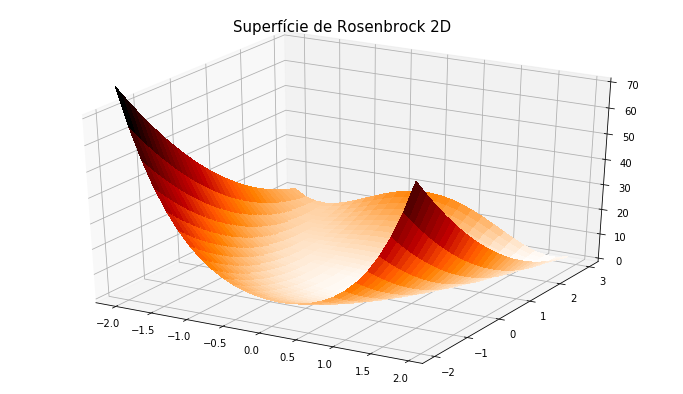

In [2]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

rosenbrock_func = lambda x,y: (x-1)**2 + 2*(y-x**2)**2
# Inicializa uma plt figure
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(projection='3d')

# Cria a superfícia a ser plotada usando o intervalo X1 [-2, 2] e X2 [-1, 3]
surface_x1 = np.arange(-2, 2, 0.15)
surface_x2 = np.arange(-2, 3, 0.15)
surface_x1, surface_x2 = np.meshgrid(surface_x1, surface_x2)
function_surface = rosenbrock_func(surface_x1, surface_x2)
# Plot the surface
surf = ax.plot_surface(surface_x1, surface_x2, function_surface, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 70)
ax.set_title("Superfície de Rosenbrock 2D", fontsize=15)
plt.show()

In [3]:
def plot_gradient_descent(surface_x1: np.array,
                          surface_x2: np.array,
                          function_surface: np.array,
                          x1_values: np.array,
                          x2_values: np.array) -> None:
    # Initialize figure 
    plt.figure(figsize=(12, 7))
    plt.contour(surface_x1, surface_x2, function_surface, 50)
    plt.plot([0],[0], marker='o', markersize = 10, color = 'r')
    plt.plot(last_x[0], last_x[1], '*', markersize=10, color = 'r')
    path = [x1_values.T, x2_values.T]
    path = np.asarray(path)
    plt.quiver(path[0,:-1], path[1,:-1],
               path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],
               scale_units = 'xy', angles = 'xy', scale = 15, color = 'k')
    plt.legend(['o', '*'],
               labels=["Ponto inicial {}".format((0, 0)),
                       "Ponto final {}".format((round(last_x[0], 5), round(last_x[1],5)))])
    plt.xlabel("X1", fontsize=13)
    plt.ylabel("X2", fontsize=13)

## Descida do gradiente explícita 

### Definindo a função Rosenbrock 2D a ser otimizada e a função que calcula o gradiente 

In [4]:
def rosenbrock_2d(x: np.array) -> float:
    x1 = x[0]
    x2 = x[1]
    return np.power((1 - x1), 2) + 100*np.power((x2 - x1**2), 2)

def calc_gradient(x: np.array) -> list:
    x1 = x[0]
    x2 = x[1]
    dx1 = -400*x1*x2 + 400*np.power(x1, 3) + 2*x1 - 2
    dx2 = 200*x2 - 200*np.power(x1, 2)
    return [dx1, dx2]

### Função de descida do gradiente

In [5]:
def gradient_descent(lr: float, lr_decay:float) -> tuple:
 
    # Variavel para salvar valores de f
    function_values = []
    
    # Ponto inicial
    current_x = [0, 0]
    # Salva valor de f no ponto inicial
    previous_f = rosenbrock_2d(current_x)
    function_values.append(previous_f)
    
    # Variaveis para plotar grafico
    X1 = []
    X2 = []
    X1.append(current_x[0])
    X2.append(current_x[1])
    
    step = 0
    while step < 5e4:
        step += 1
        # Calcula gradientes e aplica
        # descida do gradiente nos pontos
        gradients = calc_gradient(current_x)
        current_x -= lr*np.asarray(gradients)
        
        # Calcula valor da função no novo ponto
        current_f = rosenbrock_2d(current_x)
        function_values.append(current_f)     
        X1.append(current_x[0])
        X2.append(current_x[1])
        # Checagem da tolerancia
        tol_value = np.absolute(current_f - previous_f)
        if tol_value < 1e-5:
            break
        previous_f = current_f
        lr *= lr_decay

    # Retorna todos os valores assumidos pela função
    # e o ponto final
    print("Ultimo valor de f:", current_f)
    print("Ultimo ponto x1 = {0} e x2 = {1}".format(current_x[0], current_x[1]))
    print("Número de passos:", step)
    X1 = np.asarray(X1)
    X2 = np.asarray(X2)

    return [function_values, current_x, X1, X2]


### Descida do Gradiente com learning rate 1e-3

In [6]:
lr = 1e-3
lr_decay = 1
func_values, last_x, x1_values, x2_values = gradient_descent(lr, lr_decay)

Ultimo valor de f: 0.010552817956188867
Ultimo ponto x1 = 0.8973659319527167 e x2 = 0.8048289691500664
Número de passos: 3096


Text(0, 0.5, 'Rosenbrock 2D')

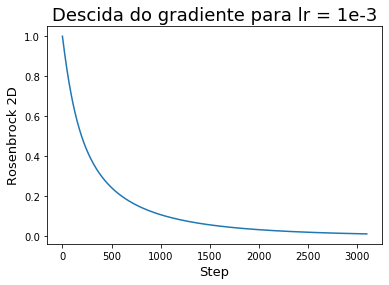

In [7]:
plt.plot(func_values)
plt.title("Descida do gradiente para lr = 1e-3", fontsize=18)
plt.xlabel("Step", fontsize=13)
plt.ylabel("Rosenbrock 2D", fontsize=13)

<ipython-input-3-5b13299584b0>:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['o', '*'],


Text(0.5, 1.0, 'Caminho da descida de gradiente\n para lr = 1e-3')

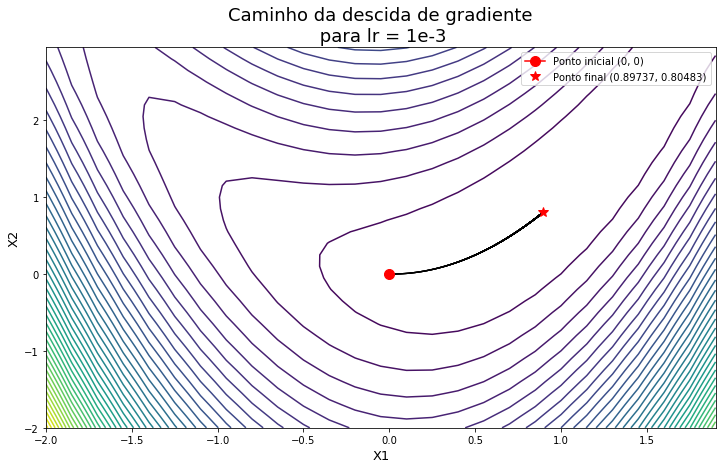

In [8]:
plot_gradient_descent(surface_x1,
                      surface_x2,
                      function_surface,
                      x1_values,
                      x2_values)
plt.title("Caminho da descida de gradiente\n para lr = 1e-3", fontsize=18)

### Descida do Gradiente com learning rate 1e-4

In [9]:
lr = 1e-4
lr_decay = 1
func_values, last_x, x1_values, x2_values = gradient_descent(lr, lr_decay)

Ultimo valor de f: 0.07731336295746939
Ultimo ponto x1 = 0.7222519131907607 e x2 = 0.5203464298142022
Número de passos: 12384


Text(0, 0.5, 'Rosenbrock 2D')

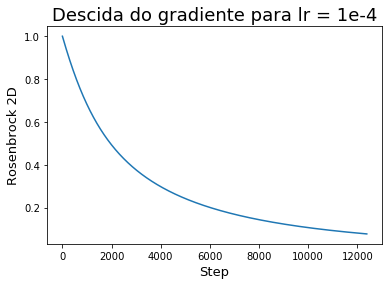

In [10]:
plt.plot(func_values)
plt.title("Descida do gradiente para lr = 1e-4", fontsize=18)
plt.xlabel("Step", fontsize=13)
plt.ylabel("Rosenbrock 2D", fontsize=13)

<ipython-input-3-5b13299584b0>:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['o', '*'],


Text(0.5, 1.0, 'Caminho da descida de gradiente\n para lr = 1e-4')

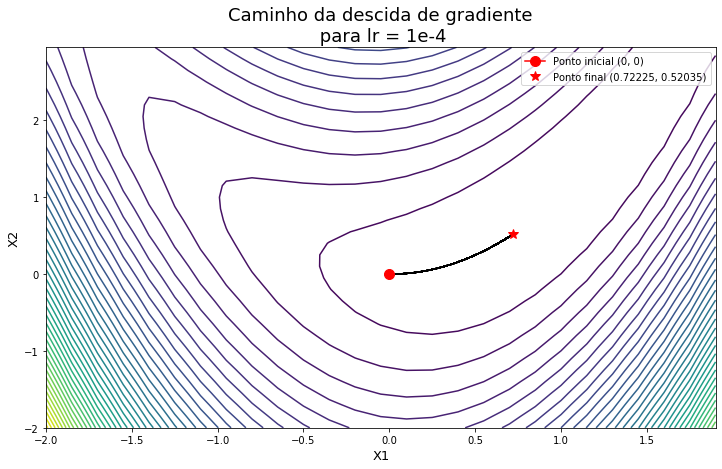

In [11]:
plot_gradient_descent(surface_x1,
                      surface_x2,
                      function_surface,
                      x1_values,
                      x2_values)
plt.title("Caminho da descida de gradiente\n para lr = 1e-4", fontsize=18)

### Descida do Gradiente com learning rate 1e-2

In [12]:
lr = 1e-2
lr_decay = 1
func_values, last_x, x1_values, x2_values = gradient_descent(lr, lr_decay)

<ipython-input-4-a538806c5a97>:4: RuntimeWarning: overflow encountered in power
  return np.power((1 - x1), 2) + 100*np.power((x2 - x1**2), 2)
<ipython-input-4-a538806c5a97>:4: RuntimeWarning: overflow encountered in double_scalars
  return np.power((1 - x1), 2) + 100*np.power((x2 - x1**2), 2)
<ipython-input-4-a538806c5a97>:9: RuntimeWarning: overflow encountered in power
  dx1 = -400*x1*x2 + 400*np.power(x1, 3) + 2*x1 - 2
<ipython-input-4-a538806c5a97>:10: RuntimeWarning: overflow encountered in power
  dx2 = 200*x2 - 200*np.power(x1, 2)
<ipython-input-4-a538806c5a97>:4: RuntimeWarning: invalid value encountered in double_scalars
  return np.power((1 - x1), 2) + 100*np.power((x2 - x1**2), 2)
<ipython-input-4-a538806c5a97>:9: RuntimeWarning: invalid value encountered in double_scalars
  dx1 = -400*x1*x2 + 400*np.power(x1, 3) + 2*x1 - 2
<ipython-input-4-a538806c5a97>:10: RuntimeWarning: invalid value encountered in double_scalars
  dx2 = 200*x2 - 200*np.power(x1, 2)


Ultimo valor de f: nan
Ultimo ponto x1 = nan e x2 = nan
Número de passos: 50000


Podemos ver que para valores grandes de $learning$ $rate$, a descida de gradiente não consegue convergir para o ponto mínimo da função. Ao invés disso ela diverge, aumentando seu valor até ocorrer um estouro de memária.

### Descida do Gradiente com política de redução do learning rate

In [13]:
lr = 5e-3
lr_decay = 0.999
func_values, last_x, x1_values, x2_values = gradient_descent(lr, lr_decay)

Ultimo valor de f: 0.009292014747243678
Ultimo ponto x1 = 0.9036913756452383 e x2 = 0.8162498914145423
Número de passos: 1472


Text(0, 0.5, 'Rosenbrock 2D')

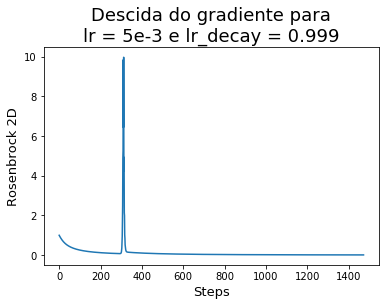

In [14]:
plt.plot(func_values)
plt.title("Descida do gradiente para\nlr = 5e-3 e lr_decay = 0.999", fontsize=18)
plt.xlabel("Steps", fontsize=13)
plt.ylabel("Rosenbrock 2D", fontsize=13)

<ipython-input-3-5b13299584b0>:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(['o', '*'],


Text(0.5, 1.0, 'Caminho da descida de gradiente para\n lr = 5e-3 e lr_decay = 0.999')

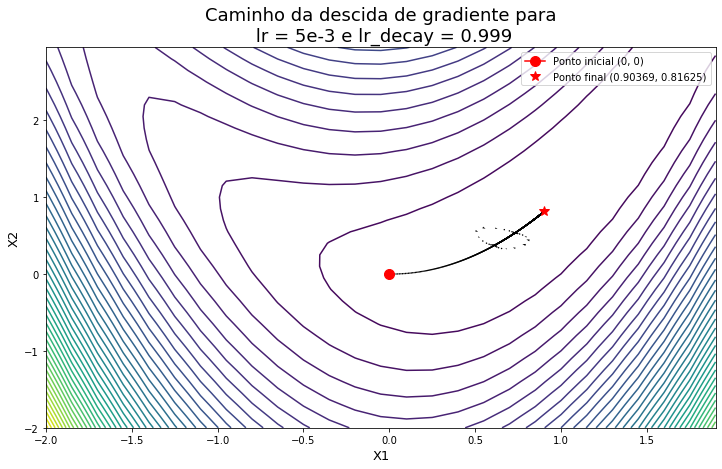

In [15]:
plot_gradient_descent(surface_x1,
                      surface_x2,
                      function_surface,
                      x1_values,
                      x2_values)
plt.title("Caminho da descida de gradiente para\n lr = 5e-3 e lr_decay = 0.999", fontsize=18)

## Descida do gradiente utilizando Tensorflow

In [16]:
import tensorflow as tf

In [17]:
# x1_ = tf.Variable(float(x1))
# x2_ = tf.Variable(float(x2))

# with tf.GradientTape() as t:
#     t.watch([x1_, x2])
#     function = rosenbrock
        
# gradients = t.gradient(function, [x1, x2])
# grad_x1 = gradientes[0]
# grad_x2 = gradientes[1]